In [ ]:
!git clone https://github.com/sheelfshah/banditpylib.git

Cloning into 'banditpylib'...
remote: Enumerating objects: 6842, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 6842 (delta 188), reused 187 (delta 171), pack-reused 6604
Receiving objects: 100% (6842/6842), 10.22 MiB | 15.28 MiB/s, done.
Resolving deltas: 100% (5108/5108), done.


In [ ]:
%cd banditpylib

/content/banditpylib


In [ ]:
!make install

pip install --upgrade pip
     |████████████████████████████████| 1.6MB 4.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
pip install -r requirements.txt
     |████████████████████████████████| 227 kB 4.1 MB/s 
     |████████████████████████████████| 105 kB 47.5 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 10.3 MB 26.1 MB/s 
     |████████████████████████████████| 21.5 MB 1.3 MB/s 
     |████████████████████████████████| 15.3 MB 171 kB/s 
     |████████████████████████████████| 9.9 MB 47.1 MB/s 
     |████████████████████████████████| 3.0 MB 41.9 MB/s 
     |████████████████████████████████| 1.0 MB 22.1 MB/s 
     |████████████████████████████████| 357 kB 60.1 MB/s 
     |████████████████████████████████| 280 kB 40.6 MB/s 
     |████████████████████████████████| 510 kB 57.0 MB/s 
     |████████████████████████████████| 28.5 MB 31 kB/s 
     |█████████████████

In [ ]:
!pip3 uninstall matplotlib
!pip3 install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2
     |████████████████████████████████| 13.1 MB 93 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 

In [1]:
# run only if updating
%cd banditpylib
!git pull
!pip install -e .

/content/banditpylib
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 6 (delta 5), reused 6 (delta 5), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/sheelfshah/banditpylib
   2848f33..286bdb6  master     -> origin/master
Updating 2848f33..286bdb6
Fast-forward
 banditpylib/learners/collaborative_learner/collaborative_agent.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
Obtaining file:///content/banditpylib
  Attempting uninstall: banditpylib
    Found existing installation: banditpylib 1.0.0
    Can't uninstall 'banditpylib'. No files were found to uninstall.
  Running setup.py develop for banditpylib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import CollaborativeLearningProtocol, SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.collaborative_learner import MyCollaborativeMaster
from banditpylib.learners.mab_fcbai_learner import ExpGap

In [12]:
confidence = 0.95
means = [0.1, 0.3, 0.5, 0.7]
rounds1, horizon1, num_agents1 = 10, 20000, 6
rounds2, horizon2, num_agents2 = 10, 50000, 2

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = MultiArmedBandit(arms=arms)
masters = [MyCollaborativeMaster(arm_num=len(arms),
    num_rounds=rounds1, time_horizon=horizon1, num_agents=num_agents1,
    name="master 1"),
    MyCollaborativeMaster(arm_num=len(arms),
    num_rounds=rounds2, time_horizon=horizon2, num_agents=num_agents2,
    name="master 2")]
trials = 20

In [13]:
game1 = CollaborativeLearningProtocol(bandit=bandit, masters=masters)
game1.play(trials=trials, output_filename="trial_outputs1.txt")

In [14]:
learners = [ExpGap(len(arms), confidence, threshold=3)]
game2 = SinglePlayerProtocol(bandit=bandit, learners=learners)
game2.play(trials=trials, output_filename="trial_outputs2.txt")

In [15]:
data_df1 = trial_data_messages_to_dict("trial_outputs1.txt")
data_df2 = trial_data_messages_to_dict("trial_outputs2.txt")

In [16]:
rm trial_outputs1.txt trial_outputs2.txt

In [17]:
data_df = pd.concat([data_df1, data_df2])
data_df["confidence"] = confidence

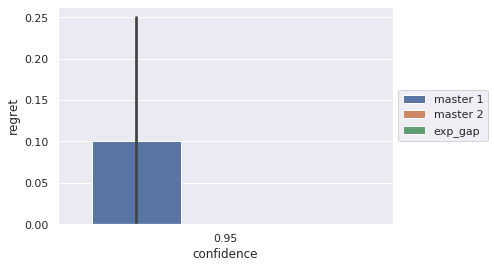

In [18]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='regret', hue='learner', data=data_df)
plt.ylabel('regret')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# non zero regret due to bug?

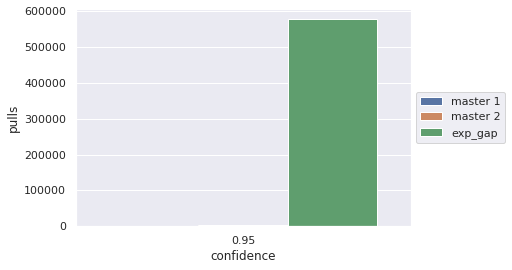

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

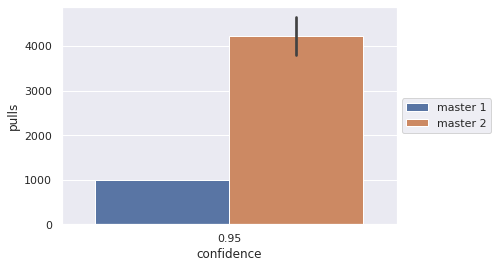

In [20]:
data_df1["confidence"] = confidence
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df1)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()